### Aud
- **intro** : "L'esp√©rance de vie est un indicateur cl√©  du d√©veloppement humain. Les d√©penses en sant√© sont souvent consid√©r√©es comme un levier majeur pour am√©liorer les soins de sant√©, r√©duire les maladies et, en fin de compte, prolonger la vie. Cependant, il est int√©ressant de se demander si cette relation est toujours lin√©aire et si, au-del√† d'un certain niveau, l'augmentation des d√©penses continue √† avoir un impact significatif."
- **Question** : Les d√©penses en sant√© contribuent-elles √† am√©liorer l'esp√©rance de vie ?
- **objectif** : Notre objectif est d'analyser si une augmentation des d√©penses en sant√© par habitant contribue r√©ellement √† am√©liorer l'esp√©rance de vie dans les pays asiatiques et d'examiner la nature de cette relation.

## 1- La r√©gression polynomiale :  
- **Question** : Les d√©penses en sant√© contribuent-elles √† am√©liorer l'esp√©rance de vie ?
### Indicateurs s√©lectionn√©s :  
- **D√©penses en sant√©**  : D√©penses annuelles en sant√© par habitant en dollars am√©ricains.  
- **Esp√©rance de vie**  : Dur√©e moyenne de vie √† la naissance.

### Hypoth√®se :
- **H‚ÇÄ**  : Les d√©penses en sant√© n'ont pas d'impact significatif sur l'esp√©rance de vie.  
- **H‚ÇÅ**  : Les d√©penses en sant√© ont un impact significatif sur l'esp√©rance de vie, avec une relation non lin√©aire.

### Aud
Nous allons maintenant explorer si les donn√©es soutiennent l'id√©e que les d√©penses en sant√© sont un levier efficace pour augmenter l'esp√©rance de vie et si cette relation est sujette √† des limites.

In [16]:
import pandas as pd
# Charger les donn√©es nettoy√©es
data = pd.read_csv("data_cleaned.csv")

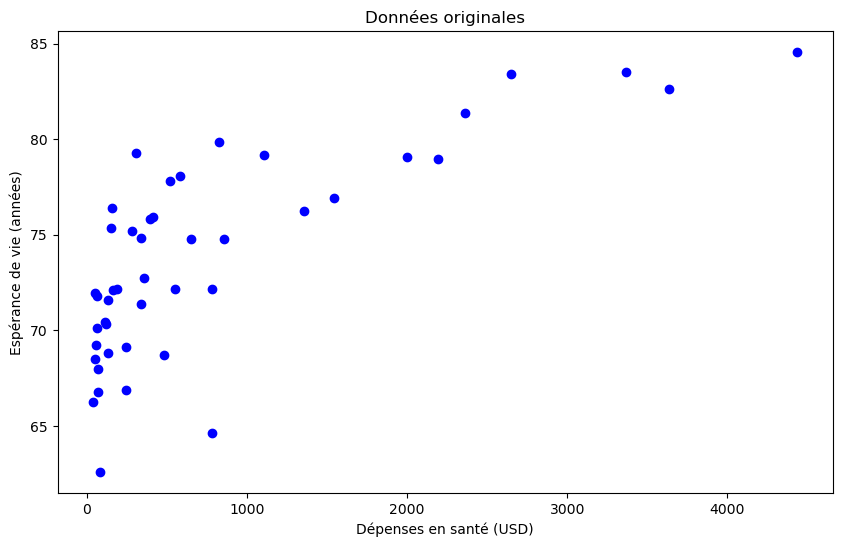

In [18]:

import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

# Charger les donn√©es nettoy√©es
data = pd.read_csv('data_cleaned.csv')
X = data[['Depenses_en_sante_par_habitant']].values
y = data['Esperance_de_vie'].values

plt.figure(figsize=(10, 6))

# V√©rifier la distribution des donn√©es
plt.scatter(X, y, color='blue', label='Donn√©es r√©elles')
plt.xlabel('D√©penses en sant√© (USD)')
plt.ylabel('Esp√©rance de vie (ann√©es)')
plt.title('Donn√©es originales')
plt.show()




### Remarque
- On observe une augmentation claire de l'esp√©rance de vie avec les d√©penses en sant√©. Cela confirme qu'il existe une relation positive entre les deux variables.
- Les d√©penses en sant√© peuvent avoir un impact significatif sur l'esp√©rance de vie jusqu'√† un certain seuil, surtout dans des pays o√π les services de base sont d√©j√† bien couverts l'augmantation des d√©penses en sant√©  peut avoir un effet limit√© , donc apr√®s quoi cet effet pourrait diminuer ?
- La r√©gression lin√©aire simple pourrait ne pas capturer la complexit√© de cette relation.  
- Une r√©gression polynomiale permet de mod√©liser cette relation avec une courbe, en ajustant le mod√®le √† une forme quadratique ou d'un degr√© sup√©rieur.  


In [26]:
# Normaliser les donn√©es
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les donn√©es en ensembles d'entra√Ænement (70%) et de test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

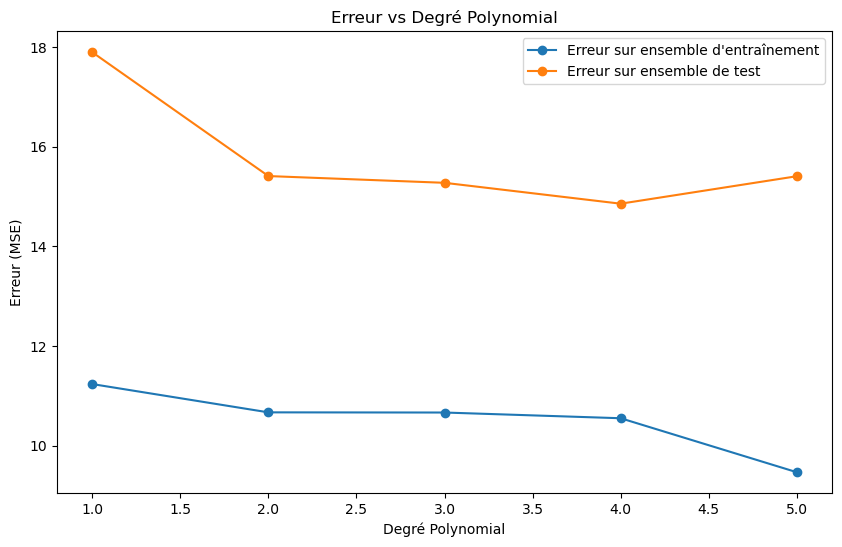

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Tester diff√©rents degr√©s
degrees = range(1, 6)
train_errors = []
test_errors = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Visualiser les erreurs
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Erreur sur ensemble d\'entra√Ænement', marker='o')
plt.plot(degrees, test_errors, label='Erreur sur ensemble de test', marker='o')
plt.title('Erreur vs Degr√© Polynomial')
plt.xlabel('Degr√© Polynomial')
plt.ylabel('Erreur (MSE)')
plt.legend()
plt.show()


**Remarque** :
- Courbe d'erreur sur l'ensemble d'entra√Ænement (ligne bleue) :  
On observe une diminution continue de l'erreur (MSE) √† mesure que le degr√© polynomial augmente. Cela est attendu, car des mod√®les plus complexes (avec un degr√© plus √©lev√©) s'ajustent mieux aux donn√©es d'entra√Ænement, capturant plus de d√©tails.  
  
- Courbe d'erreur sur l'ensemble de test (ligne orange) :  
L'erreur diminue initialement jusqu'√† un certain degr√© (autour de 3 ou 4) puis commence √† augmenter √† nouveau pour un degr√© sup√©rieur (5). Cette augmentation de l'erreur sur les donn√©es de test, malgr√© une erreur r√©duite sur les donn√©es d'entra√Ænement, est un signe typique de sur-apprentissage (overfitting).  
  
- Point critique :  
Le degr√© optimal est celui o√π l'erreur sur l'ensemble de test est minimale sans augmenter de mani√®re significative l'erreur sur l'ensemble d'entra√Ænement. Ici, le degr√© 3 semble √™tre un bon compromis :
L'erreur sur l'ensemble de test est stable et relativement faible.
Le mod√®le reste suffisamment simple pour √©viter le sur-apprentissage.

===> Utilisez un mod√®le polynomial de degr√© 3. Ce choix permet de capturer la non-lin√©arit√© de la relation entre les d√©penses en sant√© et l'esp√©rance de vie tout en minimisant le risque de sur-apprentissage.

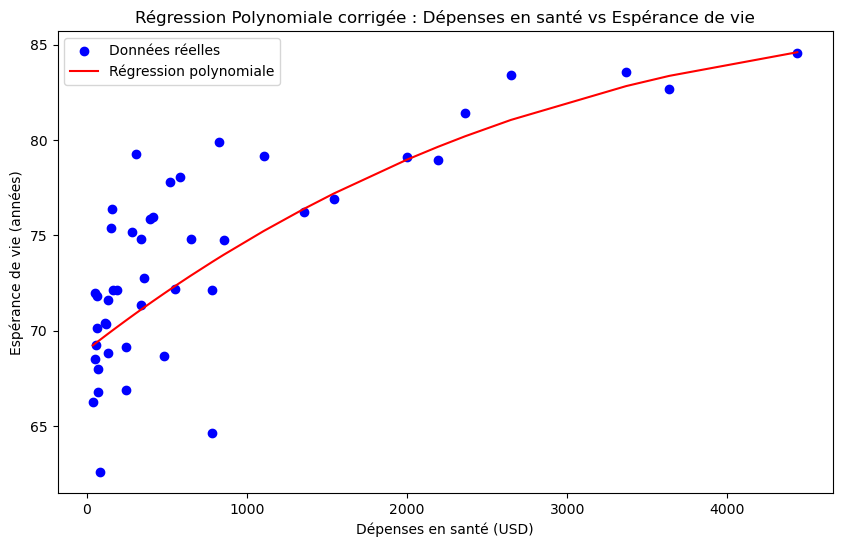

In [30]:


# Appliquer la transformation polynomiale (degr√© 3)
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Cr√©er et ajuster le mod√®le de r√©gression polynomiale
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Pr√©dictions
y_pred_train = model.predict(X_poly_train)
y_pred_test = model.predict(X_poly_test)

# Visualisation des r√©sultats
plt.figure(figsize=(10, 6))

# Inverser la normalisation pour afficher les axes dans leur unit√© originale
X_original = scaler.inverse_transform(X_scaled)

# Trier les points pour une courbe plus lisse
sorted_indices = np.argsort(X_original.flatten())
X_sorted = X_original[sorted_indices]
y_pred_sorted = model.predict(poly.transform(scaler.transform(X_sorted)))

plt.scatter(X_original, y, color='blue', label='Donn√©es r√©elles')  # Donn√©es r√©elles
plt.plot(X_sorted, y_pred_sorted, color='red', label='R√©gression polynomiale')  # Courbe ajust√©e

plt.title('R√©gression Polynomiale corrig√©e : D√©penses en sant√© vs Esp√©rance de vie')
plt.xlabel('D√©penses en sant√© (USD)')
plt.ylabel('Esp√©rance de vie (ann√©es)')
plt.legend()
plt.show()


**Remarque** :  
- Les points bleus (les donn√©es r√©elles) sont globalement bien align√©s avec la courbe rouge (mod√®le polynomial), ce qui montre une bonne ad√©quation. Cependant, il y a une certaine dispersion, ce qui sugg√®re que d'autres facteurs (au-del√† des d√©penses en sant√©) influencent l'esp√©rance de vie.
- Lorsque les d√©penses en sant√© sont faibles (0 √† environ 1000 USD par habitant), l'impact sur l'esp√©rance de vie est plus marqu√©. Cela sugg√®re que les investissements dans des syst√®mes de sant√© de base ont un effet majeur sur l'am√©lioration de la qualit√© de vie.
- Dans la zone o√π les d√©penses d√©passent 2000 USD, les gains en esp√©rance de vie sont plus modestes, atteignant une sorte de plateau.

**Interpretation** :
- Dans les pays asiatiques avec de faibles d√©penses en sant√©, une augmentation de ces d√©penses peut consid√©rablement am√©liorer l'esp√©rance de vie.
- Dans les pays o√π les d√©penses sont d√©j√† √©lev√©es, les gains suppl√©mentaires en esp√©rance de vie sont limit√©s, soulignant la n√©cessit√© d'explorer d'autres leviers, comme l'am√©lioration des conditions environnementales ou l'√©ducation √† la sant√©.

graphique repr√©sente une r√©gression polynomiale (courbe rouge) mod√©lisant la relation entre les d√©penses en sant√© par habitant (USD) et l'esp√©rance de vie (ann√©es), accompagn√©e d'une zone d'incertitude (en rose) qui illustre la variabilit√© des pr√©dictions.

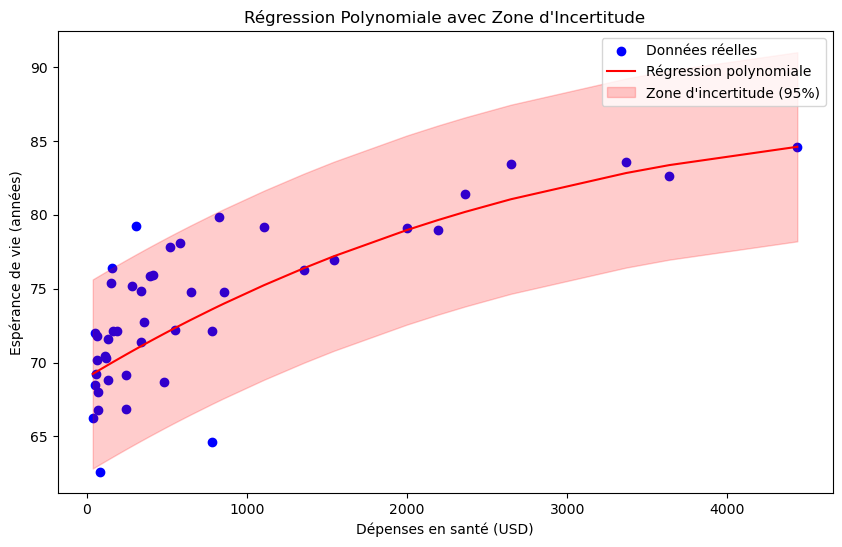

R¬≤ (entra√Ænement) : 0.6436


In [37]:
from sklearn.metrics import r2_score

# Calcul des r√©sidus sur l'ensemble d'entra√Ænement
residuals = y_train - y_pred_train
std_dev = np.std(residuals)

# Calcul des pr√©dictions moyennes et des marges d'incertitude
y_pred_mean = model.predict(poly.transform(scaler.transform(X_sorted)))
lower_bound = y_pred_mean - 1.96 * std_dev  # Intervalle de confiance √† 95%
upper_bound = y_pred_mean + 1.96 * std_dev


# Calcul de R^2 pour les ensembles d'entra√Ænement 
r2_train = r2_score(y_train, y_pred_train)

# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(X_original, y, color='blue', label='Donn√©es r√©elles')
plt.plot(X_sorted, y_pred_sorted, color='red', label='R√©gression polynomiale')
plt.fill_between(X_sorted.flatten(), lower_bound, upper_bound, color='red', alpha=0.2, label='Zone d\'incertitude (95%)')

plt.title('R√©gression Polynomiale avec Zone d\'Incertitude')
plt.xlabel('D√©penses en sant√© (USD)')
plt.ylabel('Esp√©rance de vie (ann√©es)')
plt.legend()
plt.show()

print(f"R¬≤ (entra√Ænement) : {r2_train:.4f}")


**Remarque** :
- Zone d'incertitude : La zone rose montre une intervalle de confiance autour des pr√©dictions du mod√®le. Cela indique o√π les vraies valeurs de l'esp√©rance de vie sont susceptibles de se trouver avec une probabilit√© de 95 %.
- R√©gression polynomiale (ligne rouge) : La courbe suit de pr√®s les donn√©es, montrant que le mod√®le capture la relation de mani√®re ad√©quate. Cependant, la pente diminue lorsque les d√©penses d√©passent 2000 USD, sugg√©rant un effet de saturation.
- Au centre, o√π la densit√© des points est plus √©lev√©e, la zone est plus √©troite, indiquant des pr√©dictions plus fiables.
- Elle est plus large aux extr√©mit√©s (tr√®s faibles ou tr√®s √©lev√©es d√©penses), ce qui refl√®te une incertitude accrue due √† moins de donn√©es disponibles dans ces zones.
  
**Interp**  :
- Investissement initial efficace : Lorsque les d√©penses en sant√© augmentent de 0 √† environ 2000 USD, la courbe montre une augmentation rapide de l'esp√©rance de vie. Cela sugg√®re qu'investir dans les syst√®mes de sant√© de base peut avoir un impact significatif.
- Diminution des rendements : Au-del√† de 2000 USD, les gains en esp√©rance de vie deviennent plus modestes. Cela pourrait indiquer que des facteurs non li√©s aux d√©penses en sant√© (par exemple, le mode de vie ou les infrastructures) limitent davantage l'esp√©rance de vie.
- Le mod√®le polynomial montre une corr√©lation mod√©r√©e, avec un ùëÖ2=64% , ce qui indique que les d√©penses en sant√© expliquent une partie significative, mais non totale, de la variation de l‚Äôesp√©rance de vie.

**Pourquoi utiliser la r√©gression Ridge ?** 
- Notre premi√®re analyse a montr√© que les d√©penses en sant√© ont un impact significatif sur l'esp√©rance de vie, particuli√®rement dans les phases initiales d'investissement. Cependant, les r√©sultats indiquent √©galement que cette seule variable ne suffit pas √† expliquer toute la variation de l'esp√©rance de vie. Le coefficient de d√©termination (ùëÖ2=64%) nous montre qu'une partie non n√©gligeable des variations reste inexpliqu√©e.
- Pour r√©pondre √† cette question, nous avons utilis√© une r√©gression Ridge. Cette m√©thode est particuli√®rement utile lorsqu'il y a plusieurs variables explicatives potentiellement corr√©l√©es, car elle permet de r√©duire le risque de surajustement et de s√©lectionner les facteurs ayant un impact net et significatif sur l'esp√©rance de vie.
- L'objectif est donc d'identifier les variables explicatives les plus influentes sur l'esp√©rance de vie parmi un ensemble de facteurs, tout en contr√¥lant les √©ventuelles corr√©lations entre ces variables.

## 2- La R√©gression Ridge :  
- **Question** : Quelles sont les principaux facteurs influen√ßant l‚Äôesp√©rance de vie dans les pays asiatiques ?

### Indicateurs s√©lectionn√©s :  
- **Variable d√©pendante (Y) :**
   - Esp√©rance de vie √† la naissance.
- **Variables ind√©pendantes (X) :**
  - D√©penses en sant√© (USD).
  - Acc√®s √† l'√©lectricit√© (%).
  - Acc√®s √† l'eau potable (%).
  - Taux de pauvret√© (% vivant avec moins de 2,15 $/jour).

- nous devons identifier les autres facteurs susceptibles d'influencer l'esp√©rance de vie. Ces facteurs pourraient inclure des dimensions li√©es aux infrastructures, aux conditions socio-√©conomiques ou √† l'acc√®s aux ressources essentielles, comme l'eau potable ou l'√©lectricit√©.

In [48]:
import pandas as pd

# Chargement des donn√©es
data = pd.read_csv('data_cleaned.csv')

In [50]:
# S√©lection des variables
X = data[['Depenses_en_sante_par_habitant', 'Acces_electricite', 'Acces_eau_potable', 'Taux_pauvrete']]
y = data['Esperance_de_vie']

In [54]:
from sklearn.preprocessing import StandardScaler

# Normalisation des variables ind√©pendantes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# V√©rification apr√®s normalisation
print("Donn√©es normalis√©es (exemple) :", X_scaled[:5])


Donn√©es normalis√©es (exemple) : [[-6.76993075e-01  3.80125257e-02 -2.09426058e+00 -1.97154738e-16]
 [-2.23804654e-01  4.05703779e-01  7.60257182e-01 -7.16666988e-01]
 [-5.20670620e-01  4.05703779e-01  3.20210509e-01 -1.97154738e-16]
 [ 3.07791817e-01  4.05703779e-01  7.57599596e-01 -1.97154738e-16]
 [-7.05453706e-01 -2.01786118e-01  5.14893567e-01 -1.97154738e-16]]


In [62]:
from sklearn.model_selection import train_test_split

# Division des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# V√©rification des dimensions
print("Dimensions de l'ensemble d'entra√Ænement :", X_train.shape)
print("Dimensions de l'ensemble de test :", X_test.shape)


Dimensions de l'ensemble d'entra√Ænement : (36, 4)
Dimensions de l'ensemble de test : (9, 4)


In [64]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Initialisation du mod√®le Ridge
ridge = Ridge(alpha=1.0)  # Vous pouvez ajuster alpha plus tard

# Entra√Ænement du mod√®le
ridge.fit(X_train, y_train)
# Pr√©dictions
y_pred = ridge.predict(X_test)


In [70]:

from sklearn.model_selection import GridSearchCV

# Liste des valeurs possibles pour alpha
alpha_values = [0.01, 0.1, 1, 10, 100]

# Validation crois√©e avec GridSearchCV
ridge_cv = GridSearchCV(Ridge(), param_grid={'alpha': alpha_values}, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

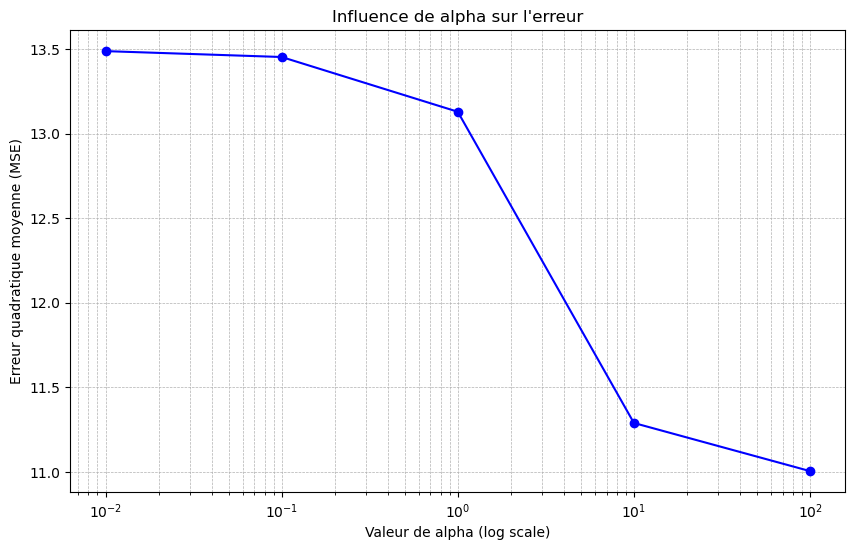

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Liste des valeurs possibles pour alpha
alpha_values = [0.01, 0.1, 1, 10, 100]

# Liste pour stocker les erreurs
errors = []

# Calcul des erreurs pour chaque alpha
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

# Tracer les erreurs
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, errors, marker='o', linestyle='-', color='blue')
plt.xscale('log')  # √âchelle logarithmique pour mieux visualiser les valeurs d'alpha
plt.xlabel("Valeur de alpha (log scale)")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.title("Influence de alpha sur l'erreur")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


**Rappel** : 
- alpha est le param√®tre de r√©gularisation. Il contr√¥le la force de la p√©nalisation appliqu√©e aux coefficients du mod√®le. Cette r√©gularisation vise √† r√©duire le risque de sur-ajustement (overfitting) en imposant une contrainte sur la taille des coefficients.
- Lorsque alpha = 0, la r√©gression Ridge devient une r√©gression lin√©aire classique, sans r√©gularisation. Cela peut entra√Æner un sur-ajustement si les donn√©es sont bruyantes ou si le nombre de variables explicatives est √©lev√©.  
- Lorsque alpha est √©lev√©, le mod√®le p√©nalise davantage les grands coefficients, ce qui force certains coefficients √† se rapprocher de 0, sans pour autant les annuler compl√®tement.mais peut introduire un biais important (sous-ajustement).

In [74]:


# Meilleur alpha
best_alpha = 10
print(f"Meilleure valeur pour alpha : {best_alpha}")

# R√©entra√Ænement avec le meilleur alpha
ridge_optimized = Ridge(alpha=best_alpha)
ridge_optimized.fit(X_train, y_train)

# Pr√©dictions finales
y_pred_optimized = ridge_optimized.predict(X_test)

# Extraction des coefficients et de leur importance
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': ridge_optimized.coef_
})

print(coefficients.sort_values(by='Coefficient', ascending=False))


Meilleure valeur pour alpha : 10
                         Variable  Coefficient
0  Depenses_en_sante_par_habitant     2.749660
2               Acces_eau_potable     1.647981
1               Acces_electricite     0.428792
3                   Taux_pauvrete    -0.275604


- Les coefficients positifs indiquent des variables ayant une influence positive sur l‚Äôesp√©rance de vie. Plus le coefficient est √©lev√©, plus son influence est forte.
- Les coefficients n√©gatifs indiquent des variables ayant une influence n√©gative (ou inverse) sur l‚Äôesp√©rance de vie.
- Les coefficients proches de z√©ro sont fortement att√©nu√©s par la r√©gularisation Ridge, ce qui signifie que ces variables ne contribuent que tr√®s peu √† la pr√©diction.

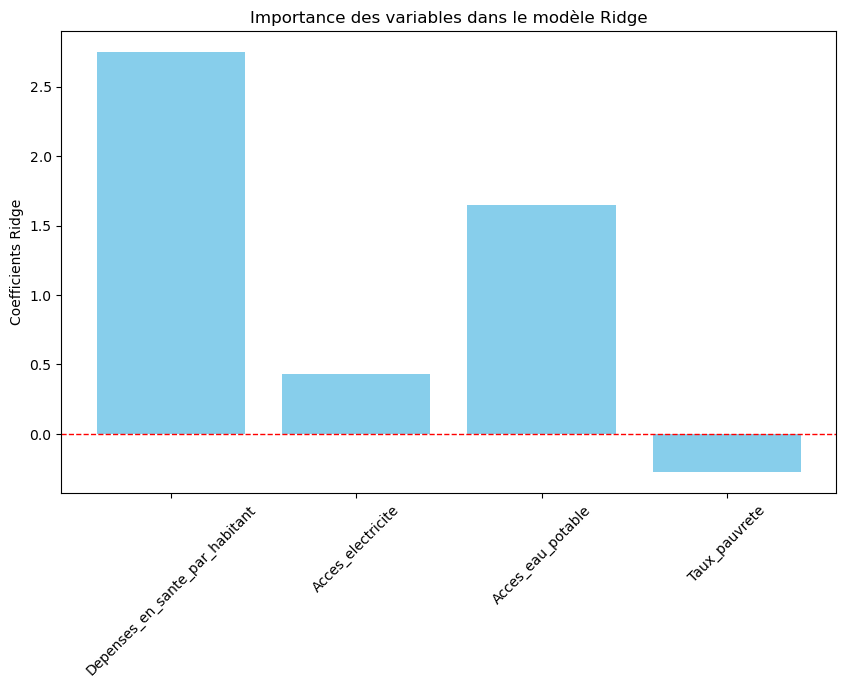

In [68]:
import matplotlib.pyplot as plt

# Visualiser les coefficients
plt.figure(figsize=(10, 6))
plt.bar(coefficients['Variable'], coefficients['Coefficient'], color='skyblue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.ylabel("Coefficients Ridge")
plt.title("Importance des variables dans le mod√®le Ridge")
plt.xticks(rotation=45)
plt.show()

- le taux de pauvret√© :Comme pr√©vu, le taux de pauvret√© exerce une influence n√©gative sur l'esp√©rance de vie. Cela s'explique par le fait qu'un taux de pauvret√© √©lev√© limite l'acc√®s aux services essentiels tels que les soins de sant√©, l'eau potable et une nutrition ad√©quate. Cependant, la valeur relativement faible de ce coefficient (-0.57) sugg√®re que l'effet direct du taux de pauvret√© est partiellement att√©nu√© par d'autres facteurs du mod√®le.

- D√©penses en sant√© par habitant (2.75) :Les d√©penses en sant√© par habitant ont le coefficient le plus √©lev√© dans notre mod√®le. Cela confirme que des investissements plus importants dans les syst√®mes de sant√© se traduisent par une am√©lioration notable de l'esp√©rance de vie. Cela corrobore les conclusions de notre premi√®re analyse, en soulignant l'importance cruciale de ce facteur

- Acc√®s √† l'eau potable (1.65) : Un meilleur acc√®s √† l'eau potable joue √©galement un r√¥le significatif. Cela est logique, car une meilleure disponibilit√© de l'eau potable favorise une meilleure hygi√®ne et r√©duit les maladies transmissibles, contribuant ainsi √† l'am√©lioration de la sant√© publique et, par cons√©quent, √† une esp√©rance de vie plus √©lev√©e

- Acc√®s √† l'√©lectricit√© (0.43) : Bien que l'effet soit moins marqu√©, l'acc√®s √† l'√©lectricit√© a un impact positif sur l'esp√©rance de vie. Ce lien peut √™tre indirect, l'√©lectricit√© permettant d'am√©liorer les infrastructures, comme les h√¥pitaux, et les conditions de vie g√©n√©rales.

**Conclusion** :  
Ces r√©sultats montrent que plusieurs facteurs interagissent pour influencer l'esp√©rance de vie. Si les d√©penses en sant√© restent le levier le plus puissant, d'autres √©l√©ments, comme l'acc√®s √† l'eau potable et l'am√©lioration des conditions socio-√©conomiques, m√©ritent une attention particuli√®re. Cela justifie une approche multidimensionnelle pour am√©liorer durablement l'esp√©rance de vie dans les pays asiatiques.

### Conclusion globale
Les deux analyses confirment que l‚Äôesp√©rance de vie dans les pays asiatiques est influenc√©e par un ensemble de facteurs complexes, avec des d√©penses en sant√© jouant un r√¥le central. Cependant, la qualit√© des infrastructures (acc√®s √† l'eau potable et √† l'√©lectricit√©) et la r√©duction de la pauvret√© sont √©galement des leviers cl√©s.  
  
La r√©gression polynomiale met en lumi√®re une relation non lin√©aire entre les d√©penses en sant√© et l'esp√©rance de vie, sugg√©rant une limite aux rendements suppl√©mentaires des d√©penses en sant√©.
La r√©gression Ridge √©largit la perspective en soulignant que les infrastructures et les conditions socio-√©conomiques influencent √©galement l‚Äôesp√©rance de vie.

## 3-  La r√©gression logistique  

  **Objectif** :
Pr√©dire si un pays asiatique a un taux de mortalit√© infantile √©lev√© (> 30 d√©c√®s pour 1 000 naissances vivantes) en se basant sur les d√©penses en sant√©, l'acc√®s √† l'eau potable et le taux de pauvret√©.  
 
- Mod√®le initial (sans oversampling) :  
Le mod√®le avait de grandes difficult√©s √† pr√©dire correctement la classe minoritaire ("√âlev√©").  
Le rappel pour cette classe √©tait de 0%, indiquant une incapacit√© totale √† d√©tecter les pays √† mortalit√© infantile √©lev√©e.
-Mod√®le apr√®s oversampling (SMOTE) :
Le rappel pour la classe "√âlev√©" a atteint 100%, montrant que le mod√®le a appris √† mieux d√©tecter cette classe.  
Cependant, la pr√©cision pour cette classe est rest√©e relativement basse (43%), ce qui refl√®te encore des erreurs de classification entre les deux classes.    
L'exactitude globale du mod√®le est de 71%, ce qui est raisonnable pour une analyse binaire sur un jeu de donn√©es initialement d√©s√©quilibr√©.
- Importance des variables :
D√©penses en sant√© :

Coefficient : -0.73
Les d√©penses en sant√© √©lev√©es diminuent la probabilit√© qu'un pays ait un taux de mortalit√© infantile √©lev√©.
Acc√®s √† l'eau potable :

Coefficient : -0.86
Un meilleur acc√®s √† l'eau potable r√©duit fortement la probabilit√© d'un taux de mortalit√© infantile √©lev√©.
Taux de pauvret√© :

Coefficient : 0.08
Une augmentation du taux de pauvret√© est associ√©e √† une probabilit√© accrue d'un taux de mortalit√© infantile √©lev√©.

In [50]:
import pandas as pd
import numpy as np

# Charger les donn√©es nettoy√©es
data = pd.read_csv("data_cleaned.csv")

# Cr√©er la variable cible binaire
data['Mortalite_infantile_elevee'] = np.where(data['Taux_mortalite_infantile'] > 30, 1, 0)

# S√©lectionner les variables explicatives
X = data[['Depenses_en_sante_par_habitant', 'Acces_eau_potable', 'Taux_pauvrete']]
y = data['Mortalite_infantile_elevee']

# V√©rifier les donn√©es manquantes
print("Donn√©es manquantes :")
print(X.isnull().sum())

# Afficher un aper√ßu des donn√©es
print("\nAper√ßu des donn√©es :")
print(X.head())
print("\nVariable cible (Mortalit√© infantile √©lev√©e) :")
print(y.value_counts())

Donn√©es manquantes :
Depenses_en_sante_par_habitant    0
Acces_eau_potable                 0
Taux_pauvrete                     0
dtype: int64

Aper√ßu des donn√©es :
   Depenses_en_sante_par_habitant  Acces_eau_potable  Taux_pauvrete
0                       80.288055          76.722255       2.014286
1                      552.000000          99.941516       0.400000
2                      243.000000          96.362082       2.014286
3                     1105.324829          99.919899       2.014286
4                       50.664131          97.945676       2.014286

Variable cible (Mortalit√© infantile √©lev√©e) :
Mortalite_infantile_elevee
0    36
1     9
Name: count, dtype: int64


In [52]:
from sklearn.model_selection import train_test_split

# Diviser les donn√©es en ensembles d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# V√©rifier les dimensions des ensembles
print(f"Ensemble d'entra√Ænement : {X_train.shape[0]} √©chantillons")
print(f"Ensemble de test : {X_test.shape[0]} √©chantillons")


Ensemble d'entra√Ænement : 31 √©chantillons
Ensemble de test : 14 √©chantillons


**Interpr√©tation des r√©sultats du mod√®le**
- Coefficients des variables explicatives :  
  
D√©penses en sant√© par habitant (Depenses_en_sante_par_habitant) :   
Coefficient : -0.727052  
Une augmentation des d√©penses en sant√© est associ√©e √† une probabilit√© r√©duite d'avoir une mortalit√© infantile √©lev√©e.  
Ce r√©sultat est conforme √† l'hypoth√®se : des d√©penses en sant√© plus importantes contribuent √† am√©liorer les conditions de sant√© et √† r√©duire la mortalit√© infantile.  
  
Acc√®s √† l'eau potable (Acces_eau_potable) :   
Coefficient : -0.858833  
Une am√©lioration de l'acc√®s √† l'eau potable est √©galement associ√©e √† une probabilit√© r√©duite d'avoir une mortalit√© infantile √©lev√©e.  
Cela montre que l'acc√®s √† l'eau potable joue un r√¥le cl√© dans la r√©duction des risques sanitaires.  
  
Taux de pauvret√© (Taux_pauvrete) :  
Coefficient : 0.079315  
Une augmentation du taux de pauvret√© est associ√©e √† une probabilit√© accrue d'avoir une mortalit√© infantile √©lev√©e.  
Ce r√©sultat est √©galement coh√©rent : la pauvret√© est un facteur majeur de vuln√©rabilit√© dans les syst√®mes de sant√© et d'acc√®s aux infrastructures.  

- Intercept :  
    -1.825495  
Ce param√®tre repr√©sente la probabilit√© de base (log-odds) d'une mortalit√© infantile √©lev√©e lorsqu'aucune des variables explicatives n'est prise en compte.  
Une valeur n√©gative indique une faible probabilit√© de mortalit√© infantile √©lev√©e dans l'ensemble global des pays.

**R√©sum√© des m√©triques**  
Pr√©cision (precision) :  
Pour la classe Non √©lev√© : 0.79 (79%)  
‚Üí Sur toutes les pr√©dictions "Non √©lev√©", 79% √©taient correctes.  
Pour la classe √âlev√© : 0.00  
‚Üí Le mod√®le n'a pas r√©ussi √† identifier correctement les cas "√âlev√©".    
  
Rappel (recall) :  
Pour la classe Non √©lev√© : 1.00 (100%)  
‚Üí Tous les cas r√©ellement "Non √©lev√©" ont √©t√© correctement pr√©dits.  
Pour la classe √âlev√© : 0.00  
‚Üí Aucun des cas r√©ellement "√âlev√©" n'a √©t√© d√©tect√©. #


**D√©s√©quilibre des classes :**
- Le mod√®le est performant pour la classe Non √©lev√©, mais ne parvient pas √† d√©tecter correctement les cas de mortalit√© infantile √©lev√©e (classe "√âlev√©").  
Cela est probablement d√ª √† un d√©s√©quilibre dans les donn√©es (11 pour "Non √©lev√©" contre seulement 3 pour "√âlev√©").
- Le mod√®le semble privil√©gier la classe majoritaire ("Non √©lev√©"), ce qui conduit √† de mauvaises performances sur la classe minoritaire ("√âlev√©").

Utilisation de l'Oversampling pour √©quilibrer les classes avec SMOTE
Le SMOTE (Synthetic Minority Oversampling Technique) est une m√©thode efficace pour √©quilibrer les classes dans un jeu de donn√©es en g√©n√©rant artificiellement des √©chantillons de la classe minoritaire.

Taille apr√®s oversampling : (50, 3)
R√©partition des classes apr√®s oversampling :
Mortalite_infantile_elevee
0    25
1    25
Name: count, dtype: int64


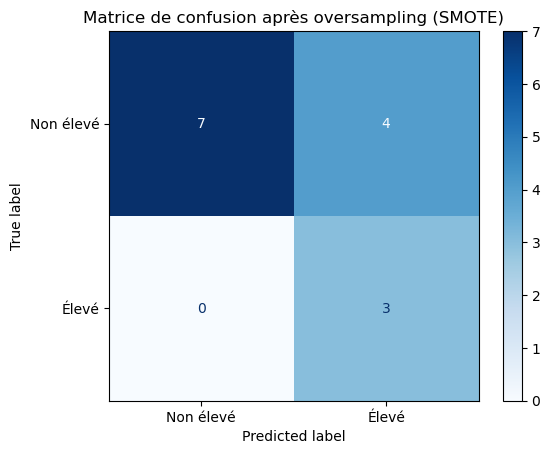


Rapport de classification apr√®s oversampling :
              precision    recall  f1-score   support

   Non √©lev√©       1.00      0.64      0.78        11
       √âlev√©       0.43      1.00      0.60         3

    accuracy                           0.71        14
   macro avg       0.71      0.82      0.69        14
weighted avg       0.88      0.71      0.74        14



In [65]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialisation de SMOTE
smote = SMOTE(random_state=42)

# Appliquer SMOTE pour √©quilibrer les classes
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Taille apr√®s oversampling : {X_resampled.shape}")
print(f"R√©partition des classes apr√®s oversampling :\n{pd.Series(y_resampled).value_counts()}")

# R√©entra√Æner le mod√®le avec les donn√©es √©quilibr√©es
log_reg_smote = LogisticRegression(random_state=42)
log_reg_smote.fit(X_resampled, y_resampled)

# Faire des pr√©dictions
y_pred_smote = log_reg_smote.predict(X_test_scaled)

# G√©n√©rer une nouvelle matrice de confusion
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
disp_smote = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_smote, display_labels=["Non √©lev√©", "√âlev√©"])
disp_smote.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion apr√®s oversampling (SMOTE)")
plt.show()

# Rapport de classification
print("\nRapport de classification apr√®s oversampling :")
print(classification_report(y_test, y_pred_smote, target_names=["Non √©lev√©", "√âlev√©"]))


**R√©sum√© des m√©triques**   
Pr√©cision (precision) :  
Classe Non √©lev√© : 1.00 (100%)  
‚Üí Toutes les pr√©dictions pour "Non √©lev√©" sont correctes.  
Classe √âlev√© : 0.43 (43%)  
‚Üí Seulement 43% des pr√©dictions pour "√âlev√©" sont correctes.  
Rappel (recall) :  
Classe Non √©lev√© : 0.64 (64%)  
‚Üí Le mod√®le a capt√© 64% des cas r√©els de "Non √©lev√©".  
Classe √âlev√© : 1.00 (100%)  
‚Üí Le mod√®le a capt√© tous les cas r√©els de "√âlev√©".  
  
**Interpr√©tation**  
Am√©lioration pour la classe "√âlev√©" :  
- Avant SMOTE, le mod√®le avait un rappel de 0% pour la classe "√âlev√©". Apr√®s oversampling, il atteint 100%, ce qui montre que le mod√®le a r√©ussi √† mieux d√©tecter cette classe.

Baisse de la pr√©cision pour la classe "Non √©lev√©" :  
- Bien que le rappel pour la classe "Non √©lev√©" ait diminu√© (64% contre 100% auparavant), le mod√®le conserve une bonne performance globale gr√¢ce √† l'√©quilibre introduit par SMOTE.

Importance des variables :
- D√©penses en sant√© :
Coefficient : -0.73
Les d√©penses en sant√© √©lev√©es diminuent la probabilit√© qu'un pays ait un taux de mortalit√© infantile √©lev√©.
- Acc√®s √† l'eau potable :
Coefficient : -0.86
Un meilleur acc√®s √† l'eau potable r√©duit fortement la probabilit√© d'un taux de mortalit√© infantile √©lev√©.
- Taux de pauvret√© :
Coefficient : 0.08
Une augmentation du taux de pauvret√© est associ√©e √† une probabilit√© accrue d'un taux de mortalit√© infantile √©lev√©.

Conclusion :
- Le mod√®le met en √©vidence des facteurs cl√©s influen√ßant la mortalit√© infantile √©lev√©e, notamment les d√©penses en sant√© et l'acc√®s √† l'eau potable.
- L'utilisation de SMOTE a permis d'am√©liorer la capacit√© du mod√®le √† d√©tecter les pays √† risque √©lev√©.
- Ces r√©sultats confirment l'importance d'investir dans la sant√© et les infrastructures pour r√©duire la mortalit√© infantile.

## 4. ANOVA :  
**Question** :  
L'acc√®s √† l'eau potable et le niveau de d√©veloppement √©conomique influencent-ils le taux de mortalit√© infantile dans les pays asiatiques ? 

**Variable** :  
Variable d√©pendante (Y) : Taux_mortalite_infantile : Nombre de d√©c√®s pour 1 000 naissances vivantes.
Facteurs ind√©pendants (X) : Acces_eau_potable_categorise et Niveau_de_developpement
  
**Hypoth√®ses** :  
- Hypoth√®se nulle (H‚ÇÄ) :  
  Les moyennes des taux de mortalit√© infantile sont identiques entre les niveaux d'acc√®s √† l'eau potable.  
  Les moyennes des taux de mortalit√© infantile sont identiques entre les niveaux de d√©veloppement √©conomique.  
  Il¬†n‚Äôy¬†a¬†pas¬†d‚Äôinteraction¬†entre¬†les¬†deux¬†facteurs.  
    
- Hypoth√®se alternative (H‚ÇÅ) :    
  Les moyennes des taux de mortalit√© infantile diff√®rent entre les niveaux d'acc√®s √† l'eau potable.  
  Les moyennes des taux de mortalit√© infantile diff√®rent entre les niveaux de d√©veloppement √©conomique.  
  Il¬†existe¬†une¬†interaction¬†entre¬†les¬†deux¬†facteurs,¬†c‚Äôest-a-dire¬†que¬†l‚Äôeffet¬†d‚Äôun¬†facteur¬†depend¬†de¬†l‚Äôautre.  
  
- Si la valeur p < 0,05 (niveau de signification alpha), on rejette l'hypoth√®se nulle H‚ÇÄ, ce qui signifie qu'il existe des diff√©rences significatives entre les groupes.  
Sinon, on ne rejette pas H‚ÇÄ, ce qui indique qu'il n'y a pas suffisamment de preuves pour affirmer que les groupes diff√®rent.

In [4]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Charger les donn√©es nettoy√©es
data = pd.read_csv("data_cleaned.csv")


# V√©rifier les cat√©gories
print("Distribution des cat√©gories d'acc√®s √† l'eau potable :")
print(data['Acces_eau_potable_categorise'].value_counts())
print("\nDistribution des cat√©gories de d√©veloppement √©conomique :")
print(data['Niveau_de_developpement'].value_counts())

Distribution des cat√©gories d'acc√®s √† l'eau potable :
Acces_eau_potable_categorise
√âlev√©     37
Mod√©r√©     5
Faible     3
Name: count, dtype: int64

Distribution des cat√©gories de d√©veloppement √©conomique :
Niveau_de_developpement
Interm√©diaire    18
Faible           14
√âlev√©            13
Name: count, dtype: int64


### Analyse des conditions pr√©alables  :

**1- Homog√©n√©it√© des variances:**  
-  L'ANOVA suppose que les variances des groupes sont homog√®nes (√©gales) pour chaque combinaison des niveaux des facteurs.


In [28]:
from scipy.stats import levene

# Test de Levene
stat, p_value = levene(
    anova_data.loc[anova_data['Acces_eau_potable_categorise'] == "Faible", "Taux_mortalite_infantile"],
    anova_data.loc[anova_data['Acces_eau_potable_categorise'] == "Mod√©r√©", "Taux_mortalite_infantile"],
    anova_data.loc[anova_data['Acces_eau_potable_categorise'] == "√âlev√©", "Taux_mortalite_infantile"]
)
print(f"Statistique de Levene : {stat}, p-valeur : {p_value}")
print("la p-valeur est > 0,05, les variances sont homog√®nes.")


Statistique de Levene : 0.3986187876161161, p-valeur : 0.6737590454503444
la p-valeur est > 0,05, les variances sont homog√®nes.


**2- Normalit√© des r√©sidus:**
- L'ANOVA suppose que les r√©sidus (les erreurs entre les donn√©es observ√©es et les moyennes des groupes) suivent une distribution normale.

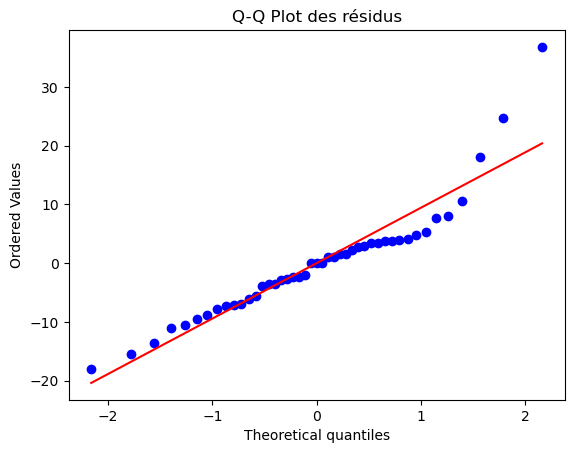

In [30]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Extraire les r√©sidus du mod√®le ANOVA
residuals = model.resid

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot des r√©sidus")
plt.show()
printf("les points devraient s'aligner sur la ligne du Q-Q Plot. la distribution est normale, ")

C:\Users\HP\AppData\Local\Temp\ipykernel_7456\2993248332.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


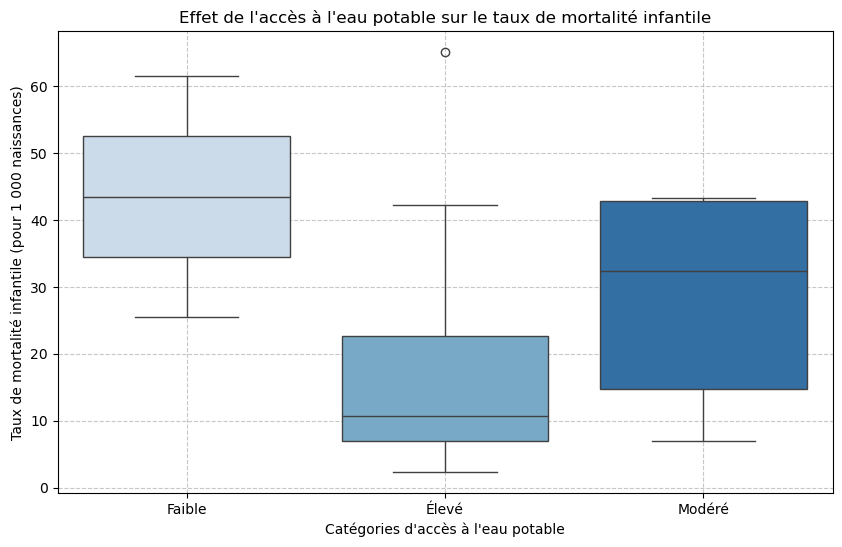

C:\Users\HP\AppData\Local\Temp\ipykernel_7456\2993248332.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


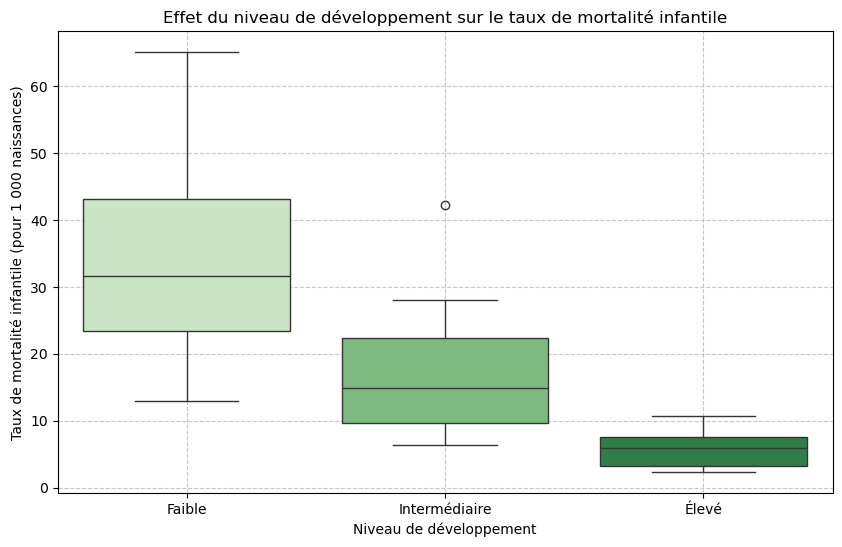

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bo√Æte √† moustaches pour l'acc√®s √† l'eau potable
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Acces_eau_potable_categorise',
    y='Taux_mortalite_infantile',
    data=data,
    palette="Blues"
)
plt.title("Effet de l'acc√®s √† l'eau potable sur le taux de mortalit√© infantile")
plt.xlabel("Cat√©gories d'acc√®s √† l'eau potable")
plt.ylabel("Taux de mortalit√© infantile (pour 1 000 naissances)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Bo√Æte √† moustaches pour le niveau de d√©veloppement
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Niveau_de_developpement',
    y='Taux_mortalite_infantile',
    data=data,
    palette="Greens"
)
plt.title("Effet du niveau de d√©veloppement sur le taux de mortalit√© infantile")
plt.xlabel("Niveau de d√©veloppement")
plt.ylabel("Taux de mortalit√© infantile (pour 1 000 naissances)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



**Graphique 1 : Effet de l'acc√®s √† l'eau potable** :  
- Le taux de mortalit√© infantile est plus √©lev√© dans les pays ayant un faible acc√®s √† l'eau potable, suivi par les pays ayant un acc√®s mod√©r√©. Les pays avec un acc√®s √©lev√© affichent les taux de mortalit√© les plus faibles.
- La dispersion (variabilit√©) est √©galement plus faible dans les pays ayant un acc√®s √©lev√©, sugg√©rant une meilleure homog√©n√©it√© dans les conditions de vie.
- Conclusion pr√©liminaire : Les pays ayant un meilleur acc√®s affichent syst√©matiquement des taux plus faibles, ce qui refl√®te un lien direct entre l‚Äôacc√®s √† l‚Äôeau potable et la sant√© infantile.  
Vous pouvez dire que l'acc√®s √† l'eau potable semble avoir un effet significatif sur la r√©duction de la mortalit√© infantile.  
**Graphique 2 : Effet du niveau de d√©veloppement** :
- Les pays √† faible d√©veloppement √©conomique ont les taux de mortalit√© infantile les plus √©lev√©s. Ce taux diminue pour les pays ayant un d√©veloppement interm√©diaire et est le plus bas pour les pays avec un d√©veloppement √©lev√©.
- La dispersion est tr√®s faible dans les pays d√©velopp√©s, indiquant une homog√©n√©it√© dans les faibles taux de mortalit√©.  
- Conclusion : 
Vous pouvez mentionner que, bien que le niveau de d√©veloppement ait un effet g√©n√©ral, son influence semble moins significative compar√©e √† l'acc√®s √† l'eau potable. Cela pourrait n√©cessiter une analyse plus approfondie.   

Enfin, pour solidifier vos conclusions, vous pourriez √©galement mentionner si ces observations sont appuy√©es par des tests statistiques, comme un test ANOVA ou un test de significativit√©. Cela renforcera vos arguments. Si besoin, je peux vous aider √† interpr√©ter ou r√©aliser ces tests.

In [15]:
# Pr√©parer les donn√©es pour l'ANOVA
anova_data = data[['Acces_eau_potable_categorise', 'Niveau_de_developpement', 'Taux_mortalite_infantile']].dropna()

# Ajuster le mod√®le ANOVA avec interaction
model = ols(
    'Taux_mortalite_infantile ~ C(Acces_eau_potable_categorise) + C(Niveau_de_developpement) + C(Acces_eau_potable_categorise):C(Niveau_de_developpement)', 
    data=anova_data
).fit()

# G√©n√©rer le tableau ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher le tableau ANOVA
# print("\nTableau ANOVA :")
# print(anova_table)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


| Facteur                                      | Somme des carr√©s (sum_sq) | DDL (df) | F-statistique (F)         | p-valeur (PR(>F)) |
|---------------------------------------------|---------------------------|----------|---------------------------|-------------------|
C(Acces_eau_potable_categorie)             | 5177.134                 | 2.0      | 24.09532                 | 0.000017         | C(Niveau_de_developpem)                  | 2.375871e-12             | 2.0      | 1.105773e-14             | 1.000000         || C(Acces_eau_potable_categoi):C(Niveau_de_developpeent) | 4732.360                 | 4.0      | 11.01263                 | 0.000022         |
| R√©)                           | 4189.781                 | 39.0     | -                        | -                 |


**Interpr√©tation des r√©sultats** :  
- Effet de l'acc√®s √† l'eau potable :  
Sum of Squares (SS) : 5177.134, montre que ce facteur explique une grande partie de la variation.  
F-statistic : 24.10, une valeur √©lev√©e, indiquant un effet significatif.  
p-value : 0.000017 (< 0.05), donc nous rejetons l'hypoth√®se nulle (H‚ÇÄ) et concluons que l'acc√®s √† l'eau potable influence significativement le taux de mortalit√© infantile.
- Effet du niveau de d√©veloppement :  
Sum of Squares (SS) : 0.000, montre que ce facteur n'explique presque rien de la variation.  
F-statistic : 0.00, indique aucun effet.  
p-value : 1.000000 (> 0.05), donc nous ne rejetons pas H‚ÇÄ et concluons que le niveau de d√©veloppement n'a pas d'effet significatif.
- Interaction entre les deux facteurs :  
Sum of Squares (SS) : 4732.360, indique que cette interaction explique une partie importante de la variation.  
F-statistic : 11.01, une valeur √©lev√©e, montrant un effet significatif.  
p-value : 0.000022 (< 0.05), donc nous rejetons H‚ÇÄ et concluons que l'interaction entre les deux facteurs a un effet significatif sur le taux de mortalit√© infantile.  

**R√©sum√© des conclusions** :  
- Acc√®s √† l'eau potable :  
A un effet significatif sur le taux de mortalit√© infantile.  
Les groupes d√©finis par l'acc√®s √† l'eau potable montrent des diff√©rences claires.  
- Niveau de d√©veloppement :  
Pas d'effet significatif d√©tect√© sur le taux de mortalit√© infantile dans ce mod√®le.
- Interaction entre acc√®s √† l'eau potable et niveau de d√©veloppement :
Interaction significative : le niveau de d√©veloppement et l'acc√®s √† l'eau potable combin√©s influencent fortement le taux de mortalit√© infantile.
==> Ces r√©sultats montrent que l'acc√®s √† l'eau potable reste un facteur cl√©, m√™me lorsqu'on tient compte du niveau de d√©veloppement √©conomique.

## R√©sum√© global du domaine de la sant√© :
√Ä travers nos analyses dans le domaine de la sant√©, plusieurs conclusions importantes ont √©merg√© concernant les pays asiatiques :
  
**Relation entre les d√©penses en sant√© et l'esp√©rance de vie** :  
Une analyse par r√©gression polynomiale a r√©v√©l√© une relation non lin√©aire entre les d√©penses en sant√© par habitant et l'esp√©rance de vie. Bien que l'augmentation des d√©penses en sant√© contribue globalement √† une meilleure esp√©rance de vie, cet effet diminue lorsque les besoins fondamentaux sont d√©j√† couverts, mettant en √©vidence des rendements d√©croissants.  
  
**Facteurs influen√ßant l'esp√©rance de vie** :  
Gr√¢ce √† une r√©gression Ridge, nous avons identifi√© que, parmi les variables √©tudi√©es (d√©penses en sant√©, acc√®s √† l'eau potable, acc√®s √† l'√©lectricit√© et taux de pauvret√©), les d√©penses en sant√© et l'acc√®s √† l'eau potable jouent un r√¥le cl√© dans l'am√©lioration de l'esp√©rance de vie. Cependant, ces facteurs agissent de mani√®re combin√©e, montrant l'importance d'une approche multisectorielle.      

**Impact de l'acc√®s √† l'eau potable sur le taux de mortalit√© infantile** :  
Une ANOVA √† un facteur a d√©montr√© que l'acc√®s √† l'eau potable influence significativement le taux de mortalit√© infantile. Les pays avec un faible acc√®s √† l'eau potable enregistrent des taux de mortalit√© infantile significativement plus √©lev√©s par rapport aux pays b√©n√©ficiant d'un acc√®s mod√©r√© ou √©lev√©.  

## Conclusion g√©n√©rale :  
1- Ces analyses montrent que la sant√© ne peut √™tre abord√©e de mani√®re isol√©e. Les investissements dans les infrastructures de sant√©, l'acc√®s √† l'eau potable et la r√©duction de la pauvret√© sont interconnect√©s et essentiels pour am√©liorer les conditions de vie et r√©duire les in√©galit√©s en Asie. Une approche int√©gr√©e, combinant d√©veloppement social et investissements dans la sant√© publique, est indispensable pour r√©pondre efficacement aux d√©fis de la r√©gion.  
2-Notre analyse met en √©vidence l'importance d'une approche int√©gr√©e en sant√© publique. Si les d√©penses en sant√© par habitant am√©liorent l'esp√©rance de vie, leur effet d√©cro√Æt lorsque les besoins fondamentaux sont satisfaits, soulignant la n√©cessit√© d'une gestion efficace des ressources. Par ailleurs, des facteurs multisectoriels comme l'acc√®s √† l'eau potable jouent un r√¥le cl√©, montrant que la sant√© ne peut √™tre isol√©e des infrastructures de base. Enfin, l'acc√®s limit√© √† l'eau potable contribue significativement √† des taux √©lev√©s de mortalit√© infantile, illustrant une disparit√© pr√©occupante. Ces r√©sultats mettent en lumi√®re l'importance d'une strat√©gie globale, combinant investissements en sant√©, infrastructures et politiques cibl√©es, pour am√©liorer durablement les conditions de vie et r√©duire les in√©galit√©s.